In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset= pd.read_csv('Dataset.csv')

<Axes: xlabel='Gender'>

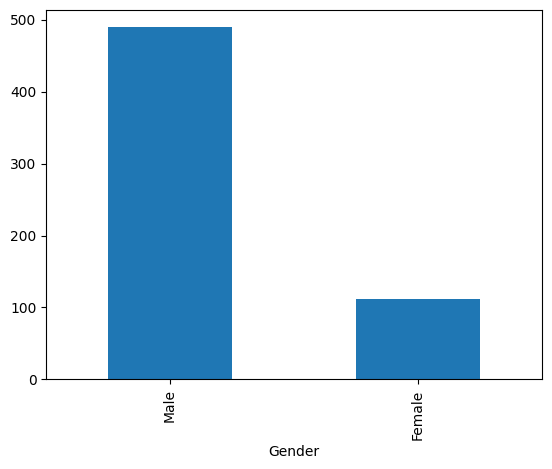

In [4]:
dataset['Gender'].value_counts().plot(kind='bar')

In [5]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### From this plot we can see that the married person have granted more loans. The unmarried person have less loan granted.

<Axes: xlabel='Married'>

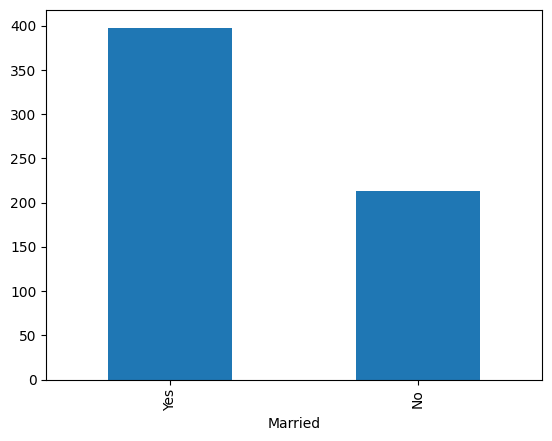

In [6]:
dataset['Married'].value_counts().plot(kind='bar')

### From this plot we can see that educated person is often granted loans easily 

<Axes: xlabel='Education'>

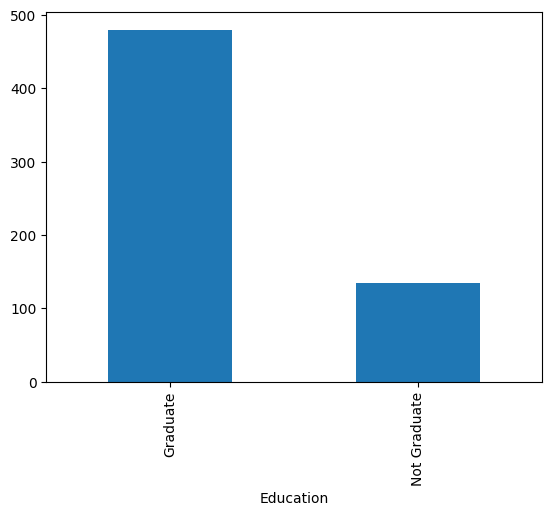

In [7]:
dataset['Education'].value_counts().plot(kind='bar')

In [8]:
import seaborn as sns


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

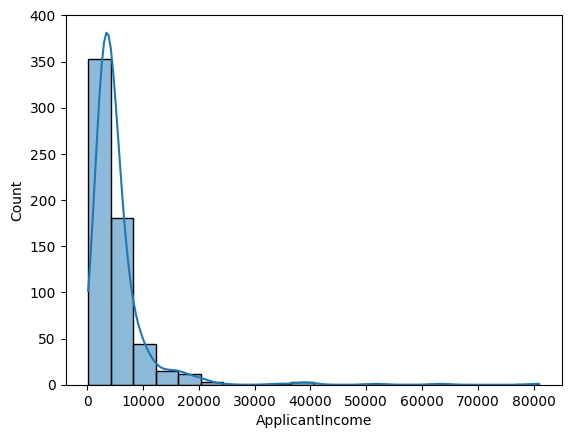

In [9]:
sns.histplot(dataset['ApplicantIncome'], bins=20, kde=True)

### From this plot we can see that Applicant income is right skewed. We can apply log transformation to make it normal distribution.

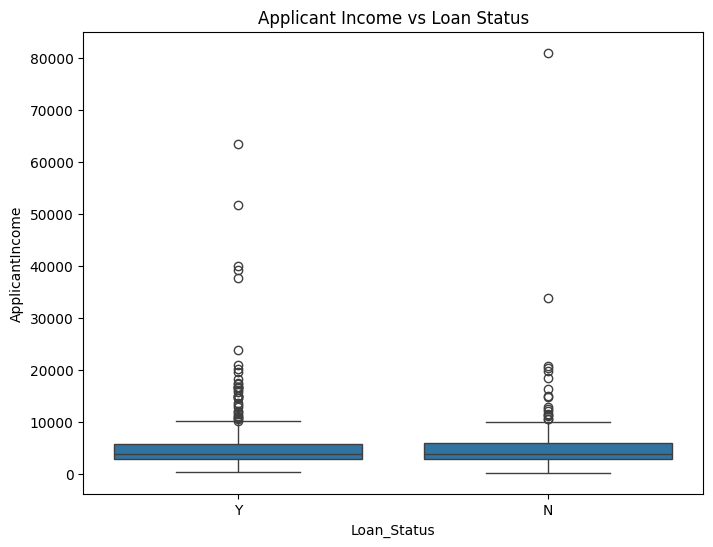

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=dataset)
plt.title('Applicant Income vs Loan Status')
plt.show()


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

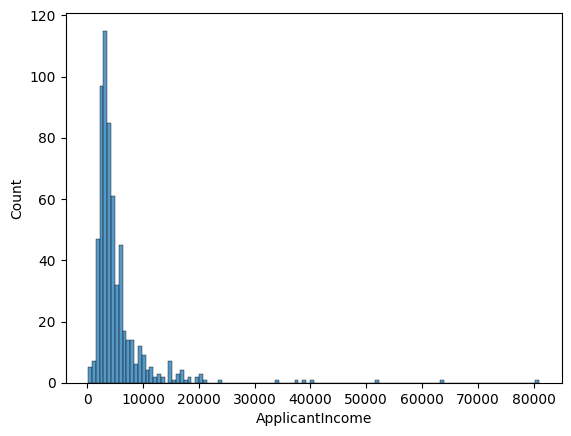

In [11]:
sns.histplot(dataset['ApplicantIncome'])

In [12]:
dataset['Logged_New_ApplicantIncome'] = np.log(dataset['ApplicantIncome'])

<Axes: xlabel='Logged_New_ApplicantIncome', ylabel='Count'>

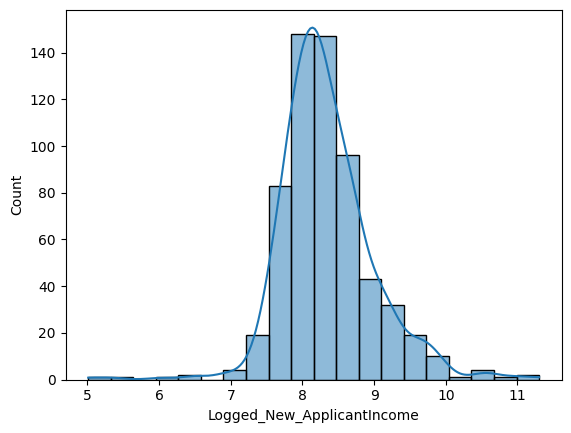

In [13]:
sns.histplot(dataset['Logged_New_ApplicantIncome'], bins=20, kde=True)

In [14]:
new_dataset = dataset.copy()
new_dataset.drop(['ApplicantIncome'], axis=1, inplace=True)

In [15]:
new_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome
0,LP001002,Male,No,0,Graduate,No,0.0,NaN,360.0,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,N,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,0.0,66.0,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,Y,7.856707
4,LP001008,Male,No,0,Graduate,No,0.0,141.0,360.0,1.0,Urban,Y,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.0,71.0,360.0,1.0,Rural,Y,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,0.0,40.0,180.0,1.0,Rural,Y,8.320205
611,LP002983,Male,Yes,1,Graduate,No,240.0,253.0,360.0,1.0,Urban,Y,8.996157
612,LP002984,Male,Yes,2,Graduate,No,0.0,187.0,360.0,1.0,Urban,Y,8.933664


In [16]:
new_dataset.isnull().sum()

Loan_ID                        0
Gender                        13
Married                        3
Dependents                    15
Education                      0
Self_Employed                 32
CoapplicantIncome              0
LoanAmount                    22
Loan_Amount_Term              14
Credit_History                50
Property_Area                  0
Loan_Status                    0
Logged_New_ApplicantIncome     0
dtype: int64

In [17]:
categorical_columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Credit_History']

In [18]:
for column in categorical_columns:
    new_dataset[column].fillna(new_dataset[column].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20892\3418008717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset[column].fillna(new_dataset[column].mode()[0], inplace=True)


In [19]:
new_dataset['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [20]:
new_dataset['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [21]:
new_dataset.isnull().sum()

Loan_ID                        0
Gender                         0
Married                        0
Dependents                     0
Education                      0
Self_Employed                  0
CoapplicantIncome              0
LoanAmount                    22
Loan_Amount_Term              14
Credit_History                 0
Property_Area                  0
Loan_Status                    0
Logged_New_ApplicantIncome     0
dtype: int64

In [22]:
new_dataset.dtypes

Loan_ID                        object
Gender                         object
Married                        object
Dependents                     object
Education                      object
Self_Employed                  object
CoapplicantIncome             float64
LoanAmount                    float64
Loan_Amount_Term              float64
Credit_History                float64
Property_Area                  object
Loan_Status                    object
Logged_New_ApplicantIncome    float64
dtype: object

In [23]:
new_dataset['Credit_History'].isnull().sum()

0

In [24]:
new_dataset['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [25]:
new_dataset.drop(['Loan_ID'], axis=1, inplace=True)

In [26]:
numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Logged_New_ApplicantIncome', 'CoapplicantIncome']

In [27]:
for column in numerical_columns:
    new_dataset[column].fillna(new_dataset[column].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20892\3297948660.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset[column].fillna(new_dataset[column].mean(), inplace=True)


In [28]:
new_dataset.isnull().sum()

Gender                        0
Married                       0
Dependents                    0
Education                     0
Self_Employed                 0
CoapplicantIncome             0
LoanAmount                    0
Loan_Amount_Term              0
Credit_History                0
Property_Area                 0
Loan_Status                   0
Logged_New_ApplicantIncome    0
dtype: int64

In [29]:
new_dataset['Loan_Amount_Term_in year']=new_dataset['Loan_Amount_Term']/12

In [30]:
new_dataset.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [31]:
new_dataset['Loan_Amount_Term_in year']

0      30.0
1      30.0
2      30.0
3      30.0
4      30.0
       ... 
609    30.0
610    15.0
611    30.0
612    30.0
613    30.0
Name: Loan_Amount_Term_in year, Length: 614, dtype: float64

In [32]:
dataset['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [33]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8.996157
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,8.933664


In [34]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
new_dataset

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome,Loan_Amount_Term_in year
0,Male,No,0,Graduate,No,0.0,146.412162,1.0,Urban,Y,8.674026,30.0
1,Male,Yes,1,Graduate,No,1508.0,128.000000,1.0,Rural,N,8.430109,30.0
2,Male,Yes,0,Graduate,Yes,0.0,66.000000,1.0,Urban,Y,8.006368,30.0
3,Male,Yes,0,Not Graduate,No,2358.0,120.000000,1.0,Urban,Y,7.856707,30.0
4,Male,No,0,Graduate,No,0.0,141.000000,1.0,Urban,Y,8.699515,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,0.0,71.000000,1.0,Rural,Y,7.972466,30.0
610,Male,Yes,3+,Graduate,No,0.0,40.000000,1.0,Rural,Y,8.320205,15.0
611,Male,Yes,1,Graduate,No,240.0,253.000000,1.0,Urban,Y,8.996157,30.0
612,Male,Yes,2,Graduate,No,0.0,187.000000,1.0,Urban,Y,8.933664,30.0


In [37]:
le={}
for column in (categorical_columns):
    le[column]=LabelEncoder()
    new_dataset[column] = le[column].fit_transform(new_dataset[column])
new_dataset

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome,Loan_Amount_Term_in year
0,1,0,0,0,0,0.0,146.412162,1,2,1,8.674026,30.0
1,1,1,1,0,0,1508.0,128.000000,1,0,0,8.430109,30.0
2,1,1,0,0,1,0.0,66.000000,1,2,1,8.006368,30.0
3,1,1,0,1,0,2358.0,120.000000,1,2,1,7.856707,30.0
4,1,0,0,0,0,0.0,141.000000,1,2,1,8.699515,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.0,71.000000,1,0,1,7.972466,30.0
610,1,1,3,0,0,0.0,40.000000,1,0,1,8.320205,15.0
611,1,1,1,0,0,240.0,253.000000,1,2,1,8.996157,30.0
612,1,1,2,0,0,0.0,187.000000,1,2,1,8.933664,30.0


In [38]:
new_dataset.dtypes

Gender                          int32
Married                         int32
Dependents                      int32
Education                       int32
Self_Employed                   int32
CoapplicantIncome             float64
LoanAmount                    float64
Credit_History                  int64
Property_Area                   int32
Loan_Status                     int32
Logged_New_ApplicantIncome    float64
Loan_Amount_Term_in year      float64
dtype: object

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
new_dataset.describe()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome,Loan_Amount_Term_in year
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,1621.245798,146.412162,0.855049,1.037459,0.687296,8.341213,28.500000
std,0.386497,0.476373,1.009623,0.413389,0.340446,2926.248369,84.037468,0.352339,0.787482,0.463973,0.645263,5.364374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,5.010635,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.250000,1.000000,0.000000,0.000000,7.964677,30.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1188.500000,129.000000,1.000000,1.000000,1.000000,8.246040,30.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,2297.250000,164.750000,1.000000,2.000000,1.000000,8.664750,30.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,41667.000000,700.000000,1.000000,2.000000,1.000000,11.302204,40.000000


In [41]:
new_dataset['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

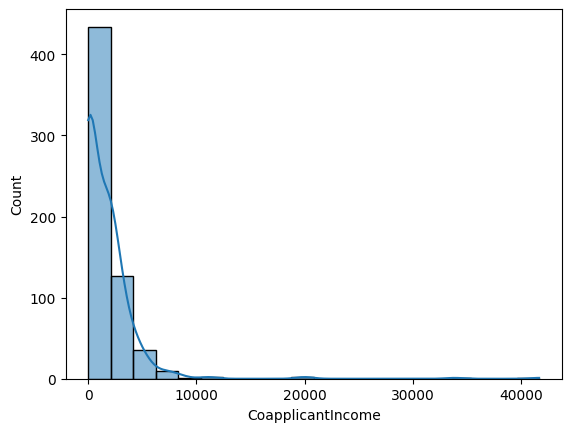

In [42]:
sns.histplot(new_dataset['CoapplicantIncome'], bins=20, kde=True)

In [43]:
new_dataset['Logged_CoapplicantIncome']=np.log1p(new_dataset['CoapplicantIncome'])

<Axes: xlabel='Logged_CoapplicantIncome', ylabel='Count'>

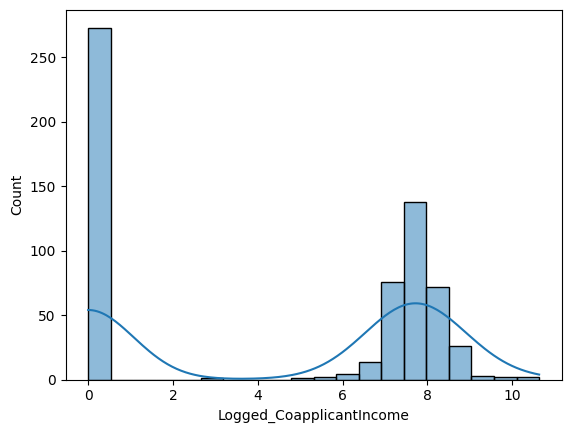

In [44]:
sns.histplot(new_dataset['Logged_CoapplicantIncome'], bins=20, kde=True)

In [45]:
new_dataset['Has_CoapplicantIncome'] = (new_dataset['CoapplicantIncome'] > 0).astype(int)


In [46]:
new_dataset['Has_CoapplicantIncome'].value_counts()

Has_CoapplicantIncome
1    341
0    273
Name: count, dtype: int64

In [47]:
new_dataset.drop(['CoapplicantIncome'], axis=1, inplace=True)

In [48]:
new_dataset

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome,Loan_Amount_Term_in year,Logged_CoapplicantIncome,Has_CoapplicantIncome
0,1,0,0,0,0,146.412162,1,2,1,8.674026,30.0,0.000000,0
1,1,1,1,0,0,128.000000,1,0,0,8.430109,30.0,7.319202,1
2,1,1,0,0,1,66.000000,1,2,1,8.006368,30.0,0.000000,0
3,1,1,0,1,0,120.000000,1,2,1,7.856707,30.0,7.765993,1
4,1,0,0,0,0,141.000000,1,2,1,8.699515,30.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,1,0,1,7.972466,30.0,0.000000,0
610,1,1,3,0,0,40.000000,1,0,1,8.320205,15.0,0.000000,0
611,1,1,1,0,0,253.000000,1,2,1,8.996157,30.0,5.484797,1
612,1,1,2,0,0,187.000000,1,2,1,8.933664,30.0,0.000000,0


<Axes: xlabel='LoanAmount', ylabel='Count'>

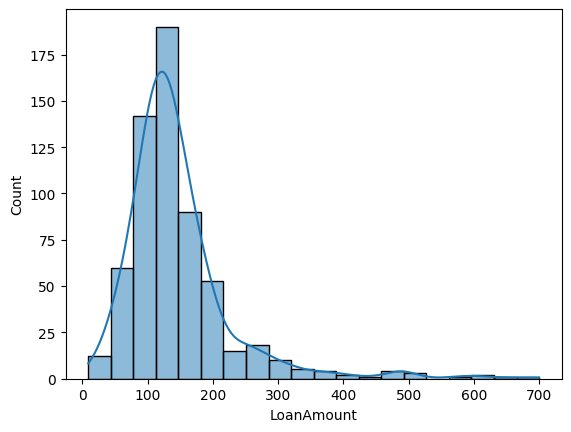

In [49]:
sns.histplot(new_dataset['LoanAmount'], bins=20, kde=True)

In [50]:
new_dataset['Logged_LoanAmount'] = np.log1p(new_dataset['LoanAmount'])


<Axes: xlabel='Logged_LoanAmount', ylabel='Count'>

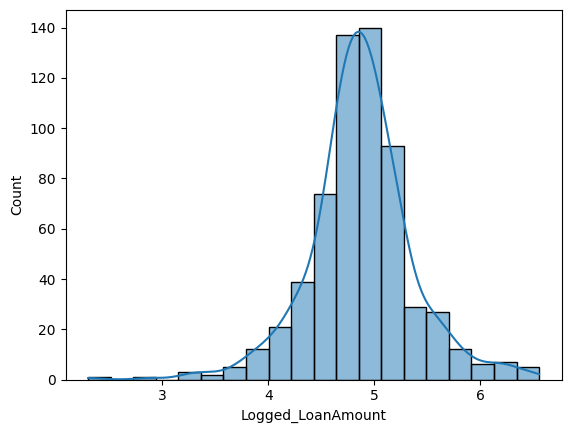

In [51]:
sns.histplot(new_dataset['Logged_LoanAmount'], bins=20, kde=True)

In [52]:
coerrelation_matrix=new_dataset.corr()

In [53]:
coerrelation_matrix['LoanAmount']

Gender                        0.107930
Married                       0.147141
Dependents                    0.163106
Education                    -0.166998
Self_Employed                 0.115260
LoanAmount                    1.000000
Credit_History               -0.001431
Property_Area                -0.044776
Loan_Status                  -0.036416
Logged_New_ApplicantIncome    0.551556
Loan_Amount_Term_in year      0.038801
Logged_CoapplicantIncome      0.047522
Has_CoapplicantIncome         0.013918
Logged_LoanAmount             0.897671
Name: LoanAmount, dtype: float64

In [54]:
coerrelation_matrix['Logged_LoanAmount']- coerrelation_matrix['LoanAmount']>0

Gender                         True
Married                        True
Dependents                    False
Education                      True
Self_Employed                 False
LoanAmount                    False
Credit_History                False
Property_Area                 False
Loan_Status                   False
Logged_New_ApplicantIncome    False
Loan_Amount_Term_in year       True
Logged_CoapplicantIncome       True
Has_CoapplicantIncome          True
Logged_LoanAmount              True
dtype: bool

In [55]:
-coerrelation_matrix['Logged_LoanAmount']+coerrelation_matrix['LoanAmount']>0

Gender                        False
Married                       False
Dependents                     True
Education                     False
Self_Employed                  True
LoanAmount                     True
Credit_History                 True
Property_Area                  True
Loan_Status                    True
Logged_New_ApplicantIncome     True
Loan_Amount_Term_in year      False
Logged_CoapplicantIncome      False
Has_CoapplicantIncome         False
Logged_LoanAmount             False
dtype: bool

In [56]:
# Keep logged version, drop the raw one
new_dataset.drop('LoanAmount', axis=1, inplace=True)


In [57]:
new_dataset.corr()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome,Loan_Amount_Term_in year,Logged_CoapplicantIncome,Has_CoapplicantIncome,Logged_LoanAmount
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.009170,-0.025752,0.017987,0.084514,-0.073567,0.220579,0.222373,0.144167
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.010938,0.004257,0.091478,0.021424,-0.100863,0.317095,0.332543,0.180222
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,-0.040160,-0.000244,0.010118,0.115816,-0.101054,-0.000732,0.007127,0.156764
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.073658,-0.065243,-0.085884,-0.181713,-0.077242,0.043127,0.060144,-0.144147
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,-0.001550,-0.030860,-0.003700,0.189821,-0.033943,-0.092308,-0.101559,0.109890
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,1.000000,0.001963,0.540556,0.013468,0.000432,0.008274,0.013297,-0.019208
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,0.001963,1.000000,0.032112,-0.029484,-0.077620,-0.055183,-0.053207,-0.092354
Loan_Status,0.017987,0.091478,0.010118,-0.085884,-0.003700,0.540556,0.032112,1.000000,0.010977,-0.020974,0.060593,0.075165,-0.042131
Logged_New_ApplicantIncome,0.084514,0.021424,0.115816,-0.181713,0.189821,0.013468,-0.029484,0.010977,1.000000,-0.030739,-0.368244,-0.373372,0.492479
Loan_Amount_Term_in year,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,0.000432,-0.077620,-0.020974,-0.030739,1.000000,0.013613,0.021402,0.085940


In [58]:
new_dataset.describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome,Loan_Amount_Term_in year,Logged_CoapplicantIncome,Has_CoapplicantIncome,Logged_LoanAmount
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,0.855049,1.037459,0.687296,8.341213,28.500000,4.290129,0.555375,4.870872
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.352339,0.787482,0.463973,0.645263,5.364374,3.875873,0.497329,0.491376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.010635,1.000000,0.000000,0.000000,2.302585
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.964677,30.000000,0.000000,0.000000,4.617584
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.246040,30.000000,7.081125,1.000000,4.867534
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,8.664750,30.000000,7.739897,1.000000,5.110477
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,11.302204,40.000000,10.637489,1.000000,6.552508


In [59]:
new_dataset

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome,Loan_Amount_Term_in year,Logged_CoapplicantIncome,Has_CoapplicantIncome,Logged_LoanAmount
0,1,0,0,0,0,1,2,1,8.674026,30.0,0.000000,0,4.993232
1,1,1,1,0,0,1,0,0,8.430109,30.0,7.319202,1,4.859812
2,1,1,0,0,1,1,2,1,8.006368,30.0,0.000000,0,4.204693
3,1,1,0,1,0,1,2,1,7.856707,30.0,7.765993,1,4.795791
4,1,0,0,0,0,1,2,1,8.699515,30.0,0.000000,0,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,1,7.972466,30.0,0.000000,0,4.276666
610,1,1,3,0,0,1,0,1,8.320205,15.0,0.000000,0,3.713572
611,1,1,1,0,0,1,2,1,8.996157,30.0,5.484797,1,5.537334
612,1,1,2,0,0,1,2,1,8.933664,30.0,0.000000,0,5.236442


In [60]:
from sklearn.model_selection import train_test_split
X = new_dataset.drop('Loan_Status', axis=1)
y = new_dataset['Loan_Status']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 12), (123, 12), (491,), (123,))

In [63]:
y_train.value_counts()

Loan_Status
1    337
0    154
Name: count, dtype: int64

In [64]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_train_smote, y_train_smote= smk.fit_resample(X_train, y_train)


In [65]:
from xgboost import XGBClassifier

In [66]:
model=XGBClassifier()

In [67]:
model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pred=model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

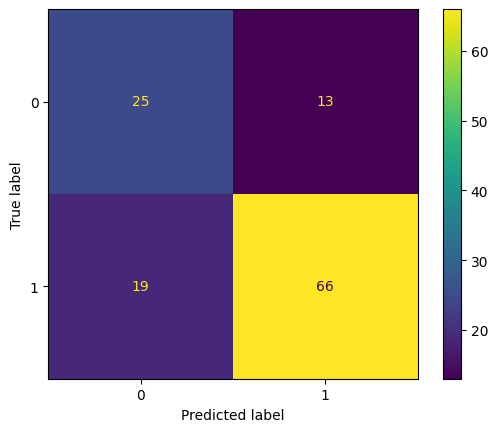

In [70]:
cm=confusion_matrix(y_test, y_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model=LogisticRegression()

In [73]:
model.fit(X_train_smote, y_train_smote)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
model.score(X_test, y_test)

0.8455284552845529

In [75]:
model.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
model.score(X_test, y_test)

0.8536585365853658

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.66      0.61        38
           1       0.84      0.78      0.80        85

    accuracy                           0.74       123
   macro avg       0.70      0.72      0.71       123
weighted avg       0.75      0.74      0.74       123

[[25 13]
 [19 66]]


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  GridSearchCV
from xgboost import XGBClassifier
models = {
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': [50, 100],
        'max_depth': [None, 10]
    }),
    "LogisticRegression": (LogisticRegression(max_iter=1000), {
        'C': [0.1, 1, 10]
    }),
    "SVC": (SVC(), {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf']
    }),
    XGBClassifier: (XGBClassifier(), {
        'n_estimators': [50, 100],
        'max_depth': [3, 5]
    })
}

In [79]:
for name, (model, params) in models.items():
    grid=GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(X_train_smote, y_train_smote)
    print(f"{name} best params: {grid.best_params_}")
    print(f"{name} best score: {grid.best_score_}")

RandomForest best params: {'max_depth': None, 'n_estimators': 100}
RandomForest best score: 0.8137112403100775
LogisticRegression best params: {'C': 0.1}
LogisticRegression best score: 0.7345324612403101
SVC best params: {'C': 0.1, 'kernel': 'linear'}
SVC best score: 0.7329457364341085
<class 'xgboost.sklearn.XGBClassifier'> best params: {'max_depth': 5, 'n_estimators': 100}
<class 'xgboost.sklearn.XGBClassifier'> best score: 0.8028464147286822


In [80]:
# 1. Split the data first (stratify to preserve distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 2. Compute imbalance ratio from y_train
from collections import Counter

counter = Counter(y_train)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos
print(f"Scale pos weight: {scale_pos_weight:.2f}")


Scale pos weight: 0.46


In [81]:
model = XGBClassifier(scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
model.score(X_test, y_test)

0.7967479674796748

In [83]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))


{0: 38, 1: 85}


In [84]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        38
           1       0.88      0.82      0.85        85

    accuracy                           0.80       123
   macro avg       0.76      0.78      0.77       123
weighted avg       0.81      0.80      0.80       123



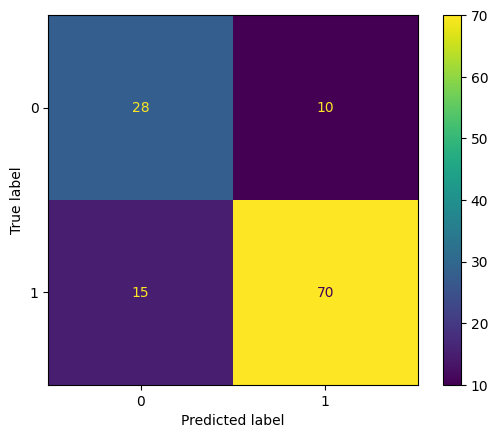

In [85]:
cm=confusion_matrix(y_test, model.predict(X_test))

cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

In [86]:
import pickle
pickle.dump(model, open('loan_prediction_model.pkl', 'wb'))


In [87]:
pickle.dump(new_dataset, open('loan_prediction_dataset.pkl', 'wb'))

In [88]:
new_dataset

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome,Loan_Amount_Term_in year,Logged_CoapplicantIncome,Has_CoapplicantIncome,Logged_LoanAmount
0,1,0,0,0,0,1,2,1,8.674026,30.0,0.000000,0,4.993232
1,1,1,1,0,0,1,0,0,8.430109,30.0,7.319202,1,4.859812
2,1,1,0,0,1,1,2,1,8.006368,30.0,0.000000,0,4.204693
3,1,1,0,1,0,1,2,1,7.856707,30.0,7.765993,1,4.795791
4,1,0,0,0,0,1,2,1,8.699515,30.0,0.000000,0,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,1,7.972466,30.0,0.000000,0,4.276666
610,1,1,3,0,0,1,0,1,8.320205,15.0,0.000000,0,3.713572
611,1,1,1,0,0,1,2,1,8.996157,30.0,5.484797,1,5.537334
612,1,1,2,0,0,1,2,1,8.933664,30.0,0.000000,0,5.236442


In [89]:
new_dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status',
       'Logged_New_ApplicantIncome', 'Loan_Amount_Term_in year',
       'Logged_CoapplicantIncome', 'Has_CoapplicantIncome',
       'Logged_LoanAmount'],
      dtype='object')

In [90]:
new_dataset['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [91]:
dataset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [92]:
new_dataset['Self_Employed'].value_counts()

Self_Employed
0    532
1     82
Name: count, dtype: int64

In [93]:
model.predict

<bound method XGBClassifier.predict of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>

In [94]:
dataset['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [95]:
dataset['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [96]:
new_dataset['Credit_History'].value_counts()

Credit_History
1    525
0     89
Name: count, dtype: int64

In [97]:
new_dataset['Education'].value_counts()

Education
0    480
1    134
Name: count, dtype: int64

In [98]:
dataset['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [99]:
dataset['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [100]:
new_dataset['Property_Area'].value_counts()

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64

In [101]:

dataset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [102]:
new_dataset['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

<Axes: xlabel='Logged_LoanAmount', ylabel='Count'>

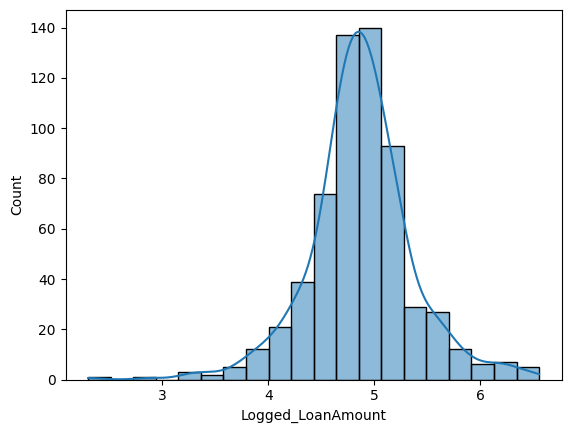

In [103]:
sns.histplot(new_dataset['Logged_LoanAmount'], bins=20, kde=True)

In [104]:
new_dataset['Logged_LoanAmount']

0      4.993232
1      4.859812
2      4.204693
3      4.795791
4      4.955827
         ...   
609    4.276666
610    3.713572
611    5.537334
612    5.236442
613    4.897840
Name: Logged_LoanAmount, Length: 614, dtype: float64

In [105]:
len(new_dataset.columns)

13

In [106]:
new_dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status',
       'Logged_New_ApplicantIncome', 'Loan_Amount_Term_in year',
       'Logged_CoapplicantIncome', 'Has_CoapplicantIncome',
       'Logged_LoanAmount'],
      dtype='object')

In [107]:
new_dataset

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome,Loan_Amount_Term_in year,Logged_CoapplicantIncome,Has_CoapplicantIncome,Logged_LoanAmount
0,1,0,0,0,0,1,2,1,8.674026,30.0,0.000000,0,4.993232
1,1,1,1,0,0,1,0,0,8.430109,30.0,7.319202,1,4.859812
2,1,1,0,0,1,1,2,1,8.006368,30.0,0.000000,0,4.204693
3,1,1,0,1,0,1,2,1,7.856707,30.0,7.765993,1,4.795791
4,1,0,0,0,0,1,2,1,8.699515,30.0,0.000000,0,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,1,7.972466,30.0,0.000000,0,4.276666
610,1,1,3,0,0,1,0,1,8.320205,15.0,0.000000,0,3.713572
611,1,1,1,0,0,1,2,1,8.996157,30.0,5.484797,1,5.537334
612,1,1,2,0,0,1,2,1,8.933664,30.0,0.000000,0,5.236442


In [108]:
new_dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status',
       'Logged_New_ApplicantIncome', 'Loan_Amount_Term_in year',
       'Logged_CoapplicantIncome', 'Has_CoapplicantIncome',
       'Logged_LoanAmount'],
      dtype='object')

In [109]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Logged_New_ApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8.996157
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,8.933664
